<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/classdemo/SpatialWeights_CitiBike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Geospatial Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt

In [2]:
!pip install geopandas


In [3]:
!pip install -U --no-deps mapclassify git+git://github.com/geopandas/geopandas.git@master


  Cloning git://github.com/geopandas/geopandas.git (to revision master) to /tmp/pip-req-build-ft3nrazs
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-ft3nrazs
Requirement already up-to-date: mapclassify in /usr/local/lib/python3.6/dist-packages (2.3.0)
  Created wheel for geopandas: filename=geopandas-0.8.0+48.g1e975ab-py2.py3-none-any.whl size=963940 sha256=d152a87bad2733f4b645c9291f001fe3b7cd31b9841686e9836f730a1c43a76e
  Stored in directory: /tmp/pip-ephem-wheel-cache-4nqy08tk/wheels/1e/57/dc/7a5ea8503aefb23576c42181adfca7fc173fde5b71900660bc
Successfully built geopandas
  Found existing installation: geopandas 0.8.0+48.g1e975ab
    Uninstalling geopandas-0.8.0+48.g1e975ab:
      Successfully uninstalled geopandas-0.8.0+48.g1e975ab


In [4]:
import geopandas as gpd


In [5]:
# this way fails...
!pip install pysal

In [6]:
#this works.... in spite of the error message
!apt install libspatialindex-c4v5
!pip install pysal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-c4v5 is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [7]:
import pysal as ps

In [8]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
cd /content/drive/Shared\ drives/PUS2020

/content/drive/Shared drives/PUS2020


In [17]:
path = "Output/ct_shape_MonthlyAve_Zoom.shp"
ctrides = gpd.GeoDataFrame.from_file(path)

In [18]:
ctrides.head()

,boro_ct201,start stat,start st_1,start st_2,monthlyrid,geometry
0,1000202,332,40.712199,-73.979481,4809,"MULTIPOLYGON (((989137.110 196325.439, 989113...."
1,1000600,331,40.711731,-73.991930,5817,"POLYGON ((986961.186 199553.643, 987206.139 19..."
2,1000700,315,40.703554,-74.006702,19521,"MULTIPOLYGON (((984804.689 193867.306, 984798...."
3,1000800,408,40.710762,-73.994004,2817,"POLYGON ((986494.145 197775.830, 986457.043 19..."
4,1000900,259,40.701221,-74.012342,5466,"MULTIPOLYGON (((984032.884 192223.748, 983984...."


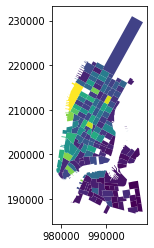

In [19]:
ctrides.plot("monthlyrid");

### Spatial Weights
Contiguity: Queen Weights

In [20]:
from libpysal.weights import Queen, Rook, KNN
rook_CT = Rook.from_shapefile(path)
queens_CT = Queen.from_shapefile(path)

/usr/local/lib/python3.6/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 95.
  warnings.warn(message)


In [21]:
rook_CT.weights

{0: [1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0],
 3

In [22]:
queens_CT.weights

{0: [1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0

#### Neighbors of index10

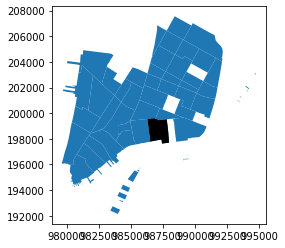

In [23]:
ax = ctrides.iloc[:42].plot()
ctrides.iloc[1:2].plot(ax=ax, color='k')

In [24]:
rook_CT.cardinalities[2], rook_CT.weights[2]

(4, [1.0, 1.0, 1.0, 1.0])

In [25]:
queens_CT.cardinalities[2], queens_CT.weights[2]

(5, [1.0, 1.0, 1.0, 1.0, 1.0])

#### Matrix of Weights

In [26]:
Wmatrix, ids = queens_CT.full()

In [27]:
Wmatrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
Wmatrix[2]

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

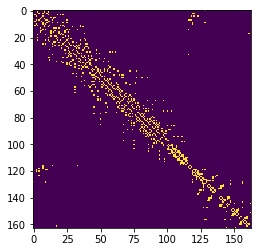

In [29]:
plt.imshow(Wmatrix, interpolation="nearest")

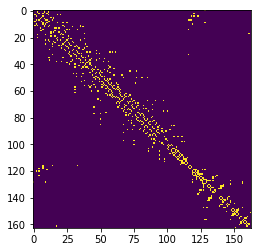

In [30]:
plt.imshow(rook_CT.full()[0], interpolation="nearest")

In [31]:
queens_CT.islands

[]

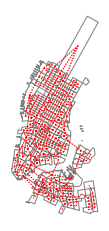

In [34]:
ax = ctrides.plot(edgecolor='grey', facecolor='w')
f,ax = rook_CT.plot(ctrides, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

(194500.7137206306, 200036.71547843944)

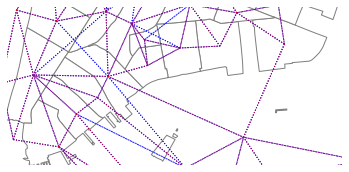

In [36]:
ax = ctrides[:42].plot(edgecolor='grey', facecolor='w')
f,ax = queens_CT.plot(ctrides, ax=ax, 
        edge_kws=dict(color='b', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
f,ax = rook_CT.plot(ctrides, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', alpha=0.5, linewidth=1),
        node_kws=dict(marker=''))


ax.set_axis_off()
plt.xlim((979715.9163543708, 991445.367886348))

plt.ylim((194500.7137206306, 200036.71547843944))


In [32]:
queens_CT.transform = 'r' 

In [33]:
queens_CT.full()[0]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.25      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

#### Change the matrix to be row-standardized

### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [37]:
import pysal.lib as ps

In [40]:
MonthlyRide = ctrides.monthlyrid
MonthlyRideLag = ps.weights.lag_spatial(queens_CT, MonthlyRide)

#### Create Quantiles for maping

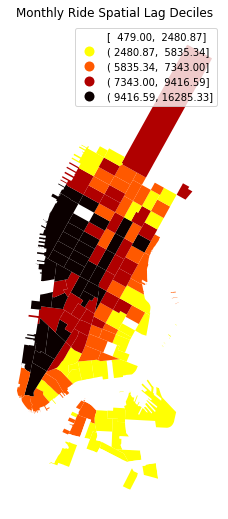

In [61]:
f, ax = plt.subplots(figsize=(9, 9))
ctrides.assign(cl=MonthlyRideLag).plot(column='cl', 
        k=5, cmap="hot_r", linewidth=0.1, ax=ax, 
         legend=True, scheme="quantiles")
ax.set_axis_off()
plt.title("Monthly Ride Spatial Lag Deciles");

## Global  Spatial Autocorrelation

### Moran Scatterplot

In [63]:
b,a = np.polyfit(MonthlyRide, MonthlyRideLag, 1)
b,a 

(0.3885035912639269, 3956.0580238739576)

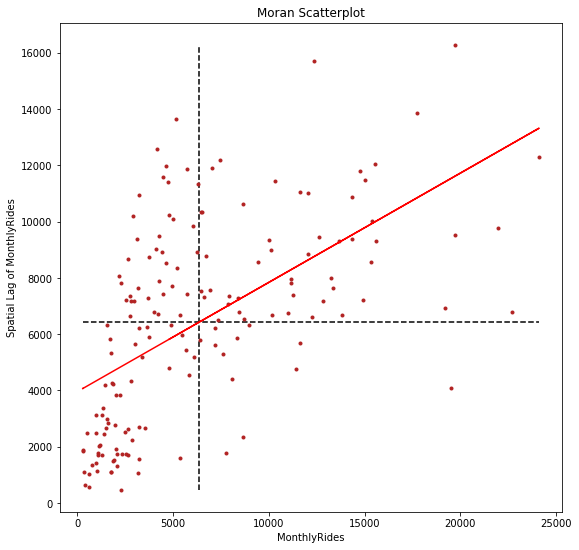

In [46]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide, MonthlyRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides');

### Moran's I

In [47]:
from pysal.explore import esda

In [48]:
I_MonthlyRide = esda.Moran(MonthlyRide, queens_CT)

In [49]:
print("the global Moran's I is {:.2f} which corresponds to a p-value of the spatial distribution being random {:.2g}".format(
    I_MonthlyRide.I, I_MonthlyRide.p_sim))

the global Moran's I is 0.39 which corresponds to a p-value of the spatial distribution being random 0.001


Note: the MI is the slope of the line!

Thus, the $I$ statistic is $0.656$ for this data, and has a very small $p$ value. 

In [50]:
I_MonthlyRide.sim[0:10]

array([-0.00416799, -0.02481771, -0.04492148, -0.07961619, -0.0208503 ,
       -0.08762832, -0.0470388 , -0.04471391,  0.01894904, -0.02913776])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [51]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

(-0.7, 0.7)

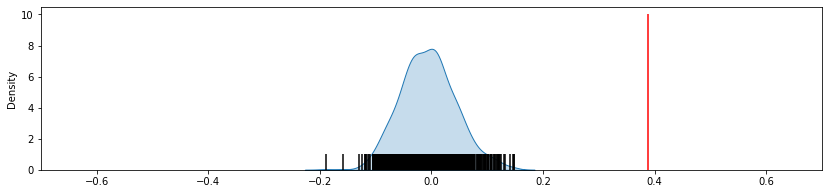

In [52]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])

In the following figure the vertical line is showing if our $I$ statistic were close to our expected value

(-0.7, 0.7)

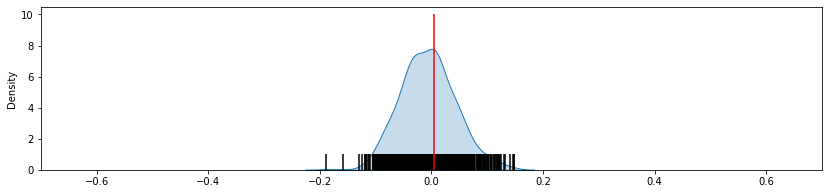

In [53]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

### LISA (Local Indicators of Spatial Autocorrelation)

In [64]:
sigs = MonthlyRide[LMo_MonthlyRide.p_sim <= .001]
W_sigs = MonthlyRideLag[LMo_MonthlyRide.p_sim <= .001]
insigs = MonthlyRide[LMo_MonthlyRide.p_sim > .001]
W_insigs = MonthlyRideLag[LMo_MonthlyRide.p_sim > .001]

### Plot Signficant LISA

Text(0.5, 0, 'MonthlyRides')

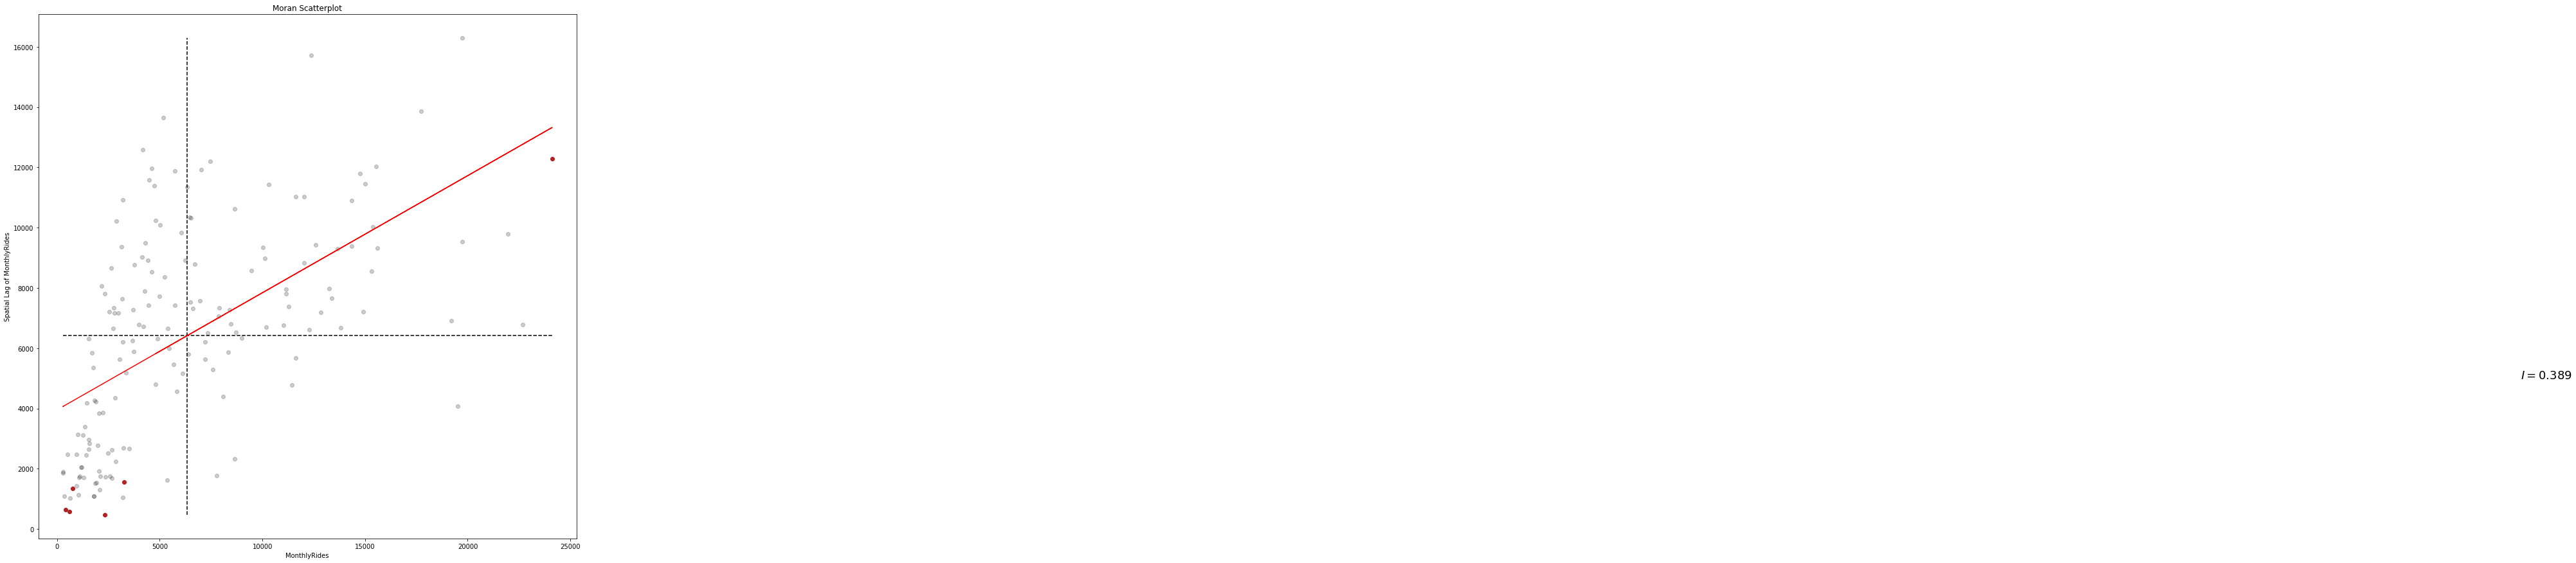

In [70]:
f, ax = plt.subplots(figsize=(15, 15))
ax.plot(sigs, W_sigs, 'o', color='firebrick')
ax.plot(insigs, W_insigs, 'ok', alpha=.2)
ax.text(s='$I = %.3f$' % I_MonthlyRide.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
ax.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
ax.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
ax.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')


### Hot and Cold spots 

In [66]:
sig = LMo_MonthlyRide.p_sim < 0.01
hotspots = LMo_MonthlyRide.q==1 * sig
coldspots = LMo_MonthlyRide.q==3 * sig
print ("Number of Hotspots:", hotspots.sum())
print ("Number of Coldspots:", coldspots.sum())

Number of Hotspots: 5
Number of Coldspots: 19


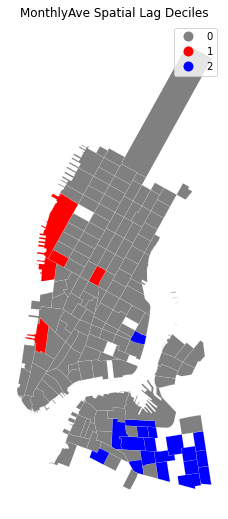

In [67]:
from matplotlib import colors

hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ctrides.assign(cl=hotcold).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("MonthlyAve Spatial Lag Deciles");